In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def safelog(x):
    return(np.log(x + 1e-100))

## Importing Data

In [2]:
# read data into memory
data_set1 = np.genfromtxt("hw02_data_set_images.csv", delimiter = ",")
data_set2 = np.genfromtxt("hw02_data_set_labels.csv",dtype=str)
# get train and test data in set and label forms
for i in range(data_set2.shape[0]):
    data_set2[i] = ord(data_set2[i].split("\"")[1])-64

k=0
m=25
n=39
train_set = np.empty((0,320), int)
test_set = np.empty((0,320), int)
train_truth = np.empty((0), int)
test_truth = np.empty((0), int)
for i in range(0,5):
    train_set = np.append(train_set, data_set1[k:m], axis=0)
    test_set = np.append(test_set, data_set1[m:n], axis=0)
    train_truth = np.append(train_truth, data_set2[k:m], axis=0).astype(int)
    test_truth = np.append(test_truth, data_set2[m:n], axis=0).astype(int)
    k = k+39
    m = m+39
    n = n+39
    
# get number of classes and number of samples
K = np.max(train_truth)
N = train_truth.shape[0]

# one-of-K encoding
Y_truth = np.zeros((N, K)).astype(int)
Y_truth[range(N), train_truth - 1] = 1

## Sigmoid Function

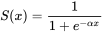

In [3]:
# define the sigmoid function
def sigmoid(x, W, wo):
    return 1/(1+np.exp(-(np.matmul(x, W)+wo)))

## Gradient Functions

\begin{align*}
\dfrac{\partial \textrm{Error}}{\partial \boldsymbol{w}} &= -\sum\limits_{i = 1}^{N} (y_{i} - \widehat{y}_{i})\boldsymbol{x}_{i} \\
\dfrac{\partial \textrm{Error}}{\partial w_{0}} &= -\sum\limits_{i = 1}^{N} (y_{i} - \widehat{y}_{i}) 
\end{align*}

In [4]:
# define the gradient functions
def gradient_W(X, y_truth, y_predicted):
    return(np.asarray([-np.sum(np.repeat((Y_truth[:,c] - Y_predicted[:,c])[:, None], X.shape[1], axis = 1) * X, axis = 0) for c in range(K)]).transpose())

def gradient_w0(Y_truth, Y_predicted):
    return(-np.sum(Y_truth - Y_predicted, axis = 0))

## Algorithm Parameters

In [5]:
# set learning parameters
eta = 0.01
epsilon = 1e-3

## Parameter Initialization

In [6]:
# randomly initalize W and w0
np.random.seed(421)
W = np.random.uniform(low = -0.01, high = 0.01, size = (train_set.shape[1], K))
w0 = np.random.uniform(low = -0.01, high = 0.01, size = (1, K))

## Iterative Algorithm

$\textrm{Error} = -\sum\limits_{i = 1}^{N} \sum\limits_{c = 1}^{K} \left[ y_{ic}\log(\widehat{y}_{ic}) \right]$

In [7]:
# learn W and w0 using gradient descent
iteration = 1
objective_values = []
while 1:
    Y_predicted = sigmoid(train_set, W, w0)

    objective_values = np.append(objective_values, 0.5*np.sum((Y_predicted - Y_truth)**2))

    W_old = W
    w0_old = w0

    W = W - eta * gradient_W(train_set, Y_truth, Y_predicted)
    w0 = w0 - eta * gradient_w0(Y_truth, Y_predicted)

    if np.sqrt(np.sum((w0 - w0_old))**2 + np.sum((W - W_old)**2)) < epsilon:
        break

    iteration = iteration + 1
print(W)
print(w0)

[[-0.02023951 -0.20894152 -0.03736009  0.38645689 -0.06393199]
 [-0.21365256  0.00666184 -0.37022519  0.65132877  0.06987449]
 [-0.22848106  0.22262875 -0.40266821  0.46604116  0.09470585]
 ...
 [ 0.0838139   0.41137877  0.09724862 -0.52715565 -0.36279681]
 [ 0.13001164 -0.49368446  0.10390323 -0.57839917 -0.06545466]
 [ 0.17699078 -0.71473047  0.26602823 -0.4680901  -0.04909041]]
[[-0.14512904 -0.4970789  -0.00068896 -0.06419715 -0.44790037]]


## Convergence

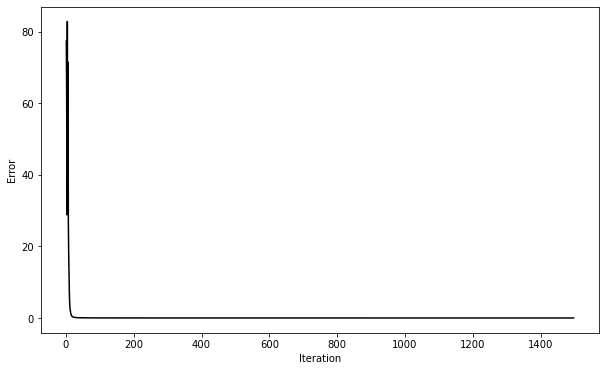

In [8]:
# plot objective function during iterations
plt.figure(figsize = (10, 6))
plt.plot(range(1, iteration + 1), objective_values, "k-")
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.show()

## Training Set Performance

In [9]:
# calculate confusion matrix
y_predicted = np.argmax(Y_predicted, axis = 1) + 1 
confusion_matrix = pd.crosstab(y_predicted, train_truth, rownames = ['y_pred'], colnames = ['y_truth'])
print(confusion_matrix)

y_truth   1   2   3   4   5
y_pred                     
1        25   0   0   0   0
2         0  25   0   0   0
3         0   0  25   0   0
4         0   0   0  25   0
5         0   0   0   0  25


## Test Set Performance

In [10]:
# calculate confusion matrix
Y_predicted = sigmoid(test_set, W, w0)
y_predicted = np.argmax(Y_predicted, axis = 1) + 1 
confusion_matrix = pd.crosstab(y_predicted, test_truth, rownames = ['y_pred'], colnames = ['y_truth'])
print(confusion_matrix)

y_truth   1   2   3   4   5
y_pred                     
1        13   1   0   0   0
2         1  11   0   0   2
3         0   0  14   0   0
4         0   1   0  14   0
5         0   1   0   0  12
